# STAT 535C Final Project

# Part 1 - Performance Analysis
First we perform a performance analysis as outlined in our original report

In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.5.0     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
results <- read.csv("results.csv")
head(results)

,Function,n,p,b,mu,se,hits,ess,processTime
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,MHRN,1000,0.005098,100000,0.0012612210,6.698491e-03,4294,358.9535,97.786806
2,MHNLN,10,0.075400,100000,0.0009948162,5.046475e-05,36096,3334.6179,1.005325
3,Naive,10,0.075400,100000,0.0010400000,1.019273e-04,104,100000.0000,0.271367
4,MHNLN,1000,0.005098,100000,0.0034082941,1.435876e-03,4573,22819.8710,73.847416
5,MH1,100,0.027320,100000,0.0001883840,4.699276e-04,9261,319.5344,3.877555
6,Analytic,100,0.027320,100000,0.0012284294,5.081740e-05,100000,100000.0000,28.248216


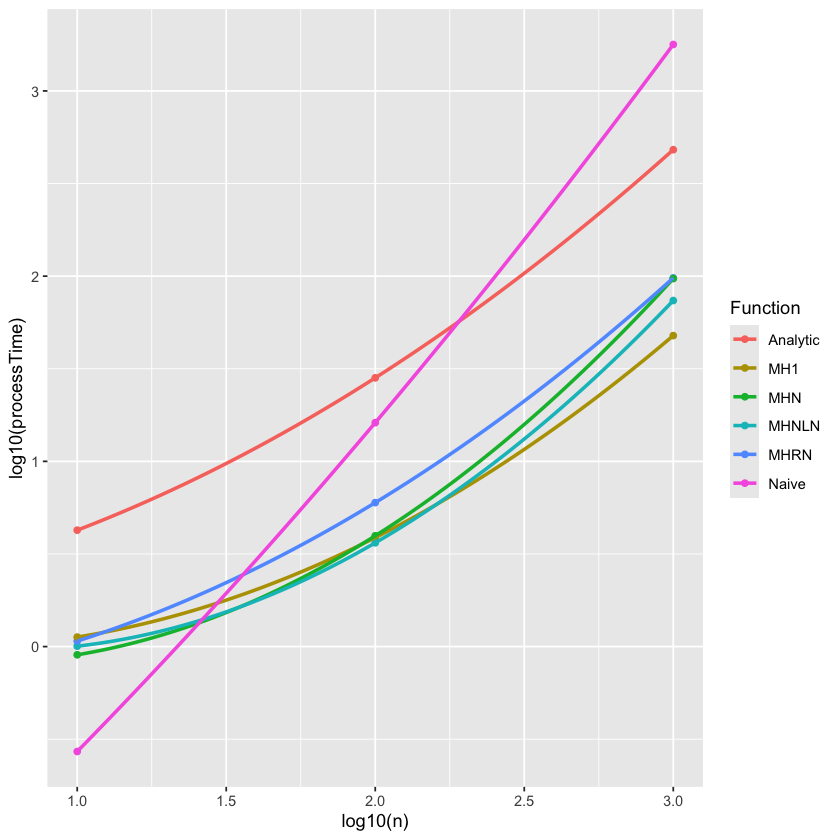

In [26]:
# First lets plot time as a function of n at fixed b
ggplot(data = results, mapping = aes(x=log10(n), y=log10(processTime), color=Function)) + 
geom_point() +    
geom_smooth(method="lm", formula= y ~ poly(x,2), se = FALSE)

Runtime scaled as expected

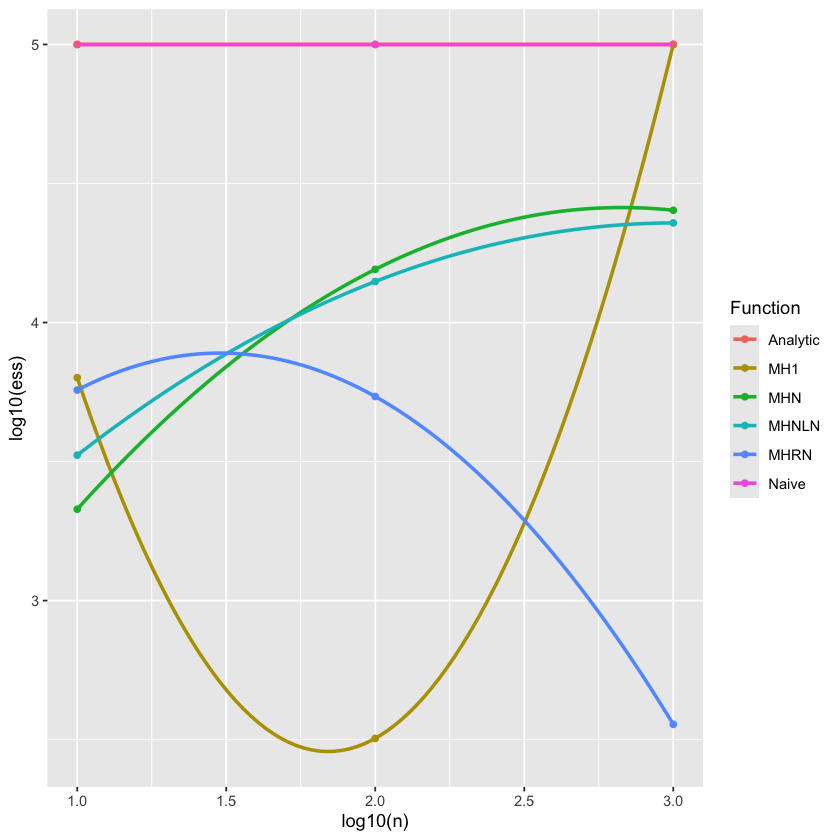

In [4]:
# ESS
ggplot(data = results, mapping = aes(x=log10(n), y=log10(ess), color=Function)) + 
geom_point() + 
geom_smooth(method="lm", formula =y ~ poly(x,2), se = FALSE)

ESS is as expected except for the MH1 sampler which had zero hits in the largest case and hence had a falsely inflated ESS.

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Failed to fit group 2.
Caused by error in `poly()`:
! 'degree' must be less than number of unique points"


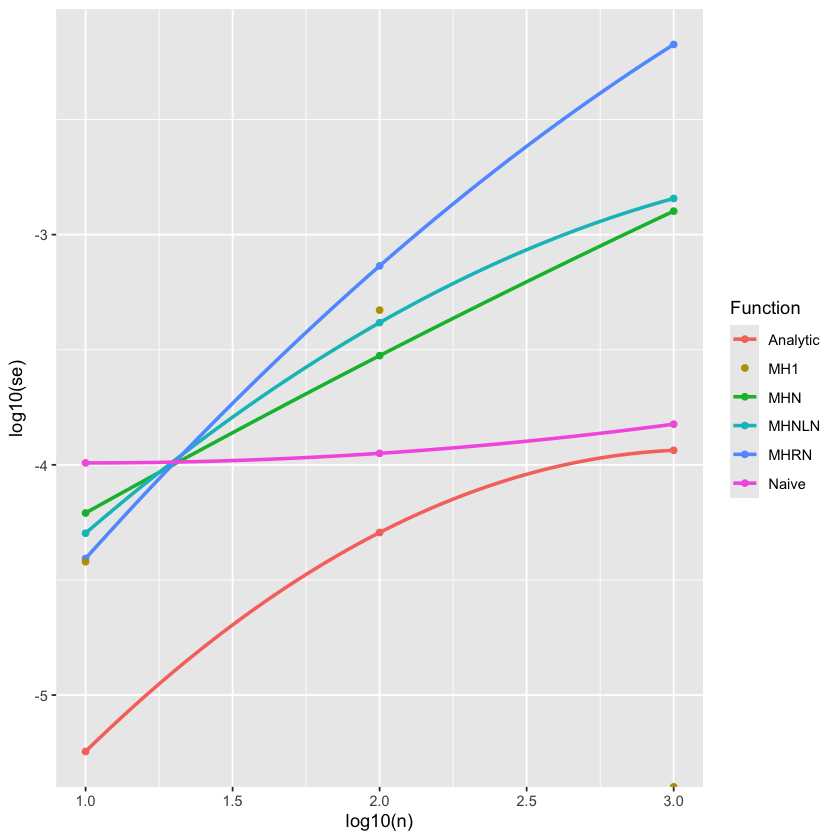

In [5]:
# Standard error... use with caution
ggplot(data = results, mapping = aes(x=log10(n), y=log10(se), color=Function)) + 
geom_point() +    
geom_smooth(method="lm", formula= y ~ poly(x,2), se = FALSE)

Finally we see SE. As expected our analytic sampler has the best performance.

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_smooth()`)."
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message:
"Failed to fit group 2.
Caused by error in `poly()`:
! 'degree' must be less than number of unique points"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


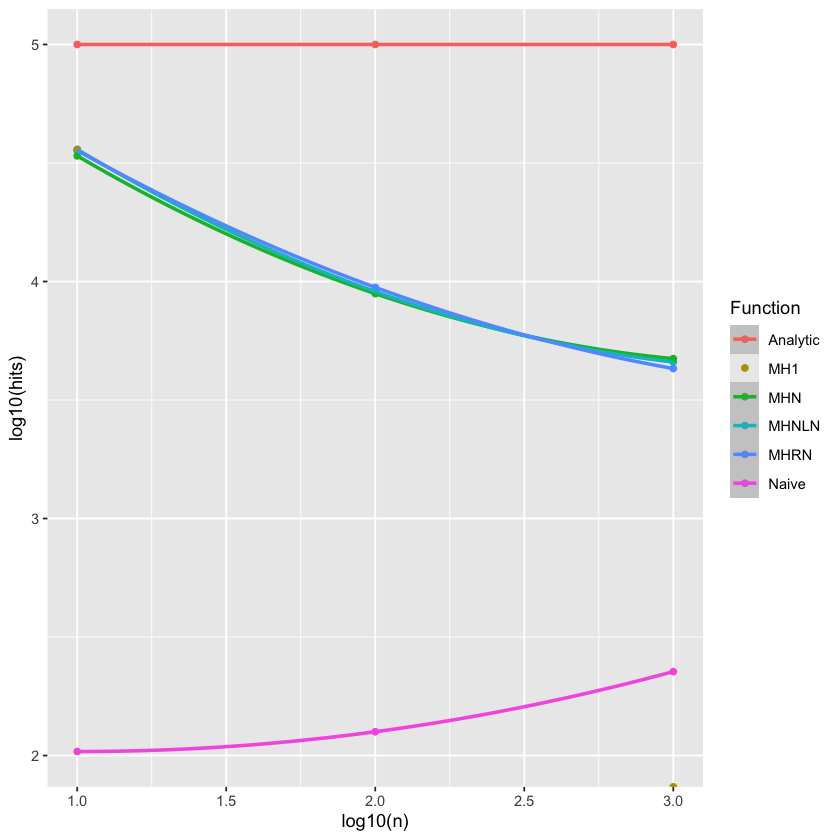

In [6]:
# Hits
ggplot(data = results, mapping = aes(x=log10(n), y=log10(hits), color=Function)) + 
geom_point() + 
geom_smooth(method = "lm", formula = y ~ poly(x,2))

Interestingly the number of hits for the MCMC samplers gets worse for high $n$. We conjecture this is a result of the transition behaviour.

Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


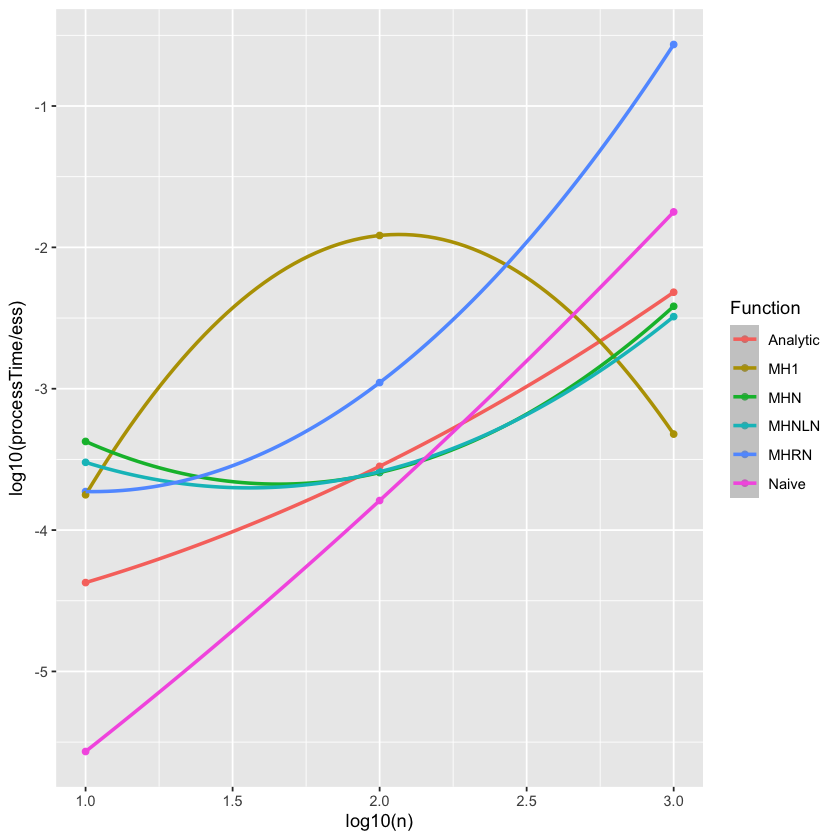

In [27]:
# Computer time per ESS
ggplot(data = results, mapping = aes(x=log10(n), y=log10(processTime/ess), color=Function)) + 
geom_point() +
geom_smooth(method="lm", formula = y ~ poly(x,2))

Our large MCMC samplers perform pretty well when measured by ESS.

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_smooth()`)."
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message:
"Failed to fit group 2.
Caused by error in `poly()`:
! 'degree' must be less than number of unique points"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


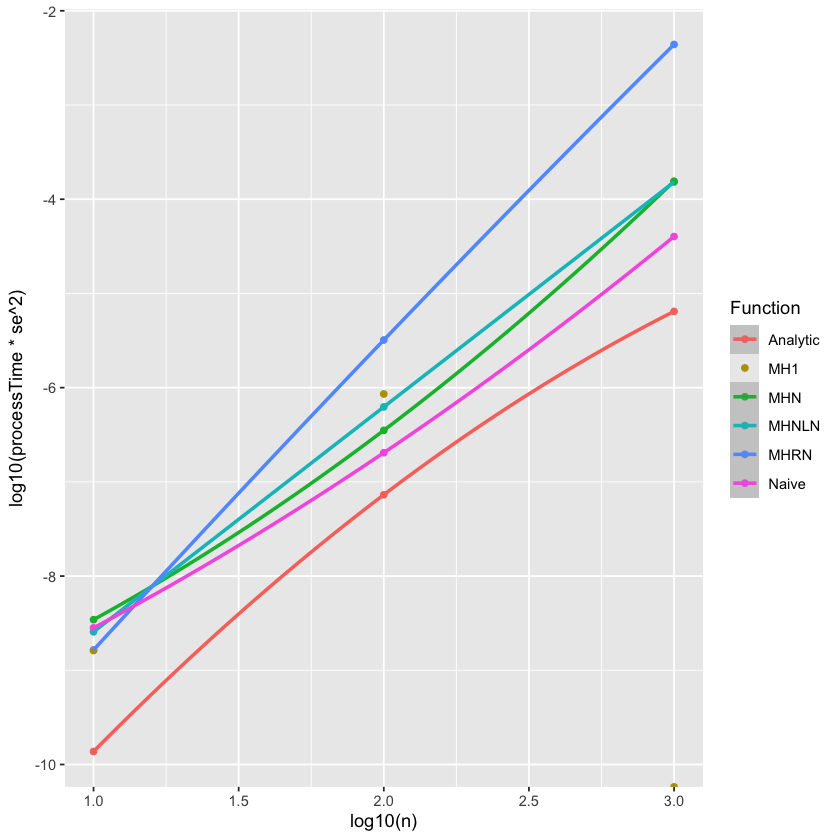

In [28]:
# Computer time per unit precision.
ggplot(data = results, mapping = aes(x=log10(n), y=log10(processTime*se^2), color=Function)) + 
geom_point() +
geom_smooth(method="lm", formula = y ~ poly(x,2))

The only differencence between this plot and the ESS plot is it takes into account the variance in the importance weights. The high variance in importance weights is unexpected and indicates we have chosen a poor majorizing distribution.

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_smooth()`)."
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message:
"Failed to fit group 2.
Caused by error in `poly()`:
! 'degree' must be less than number of unique points"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


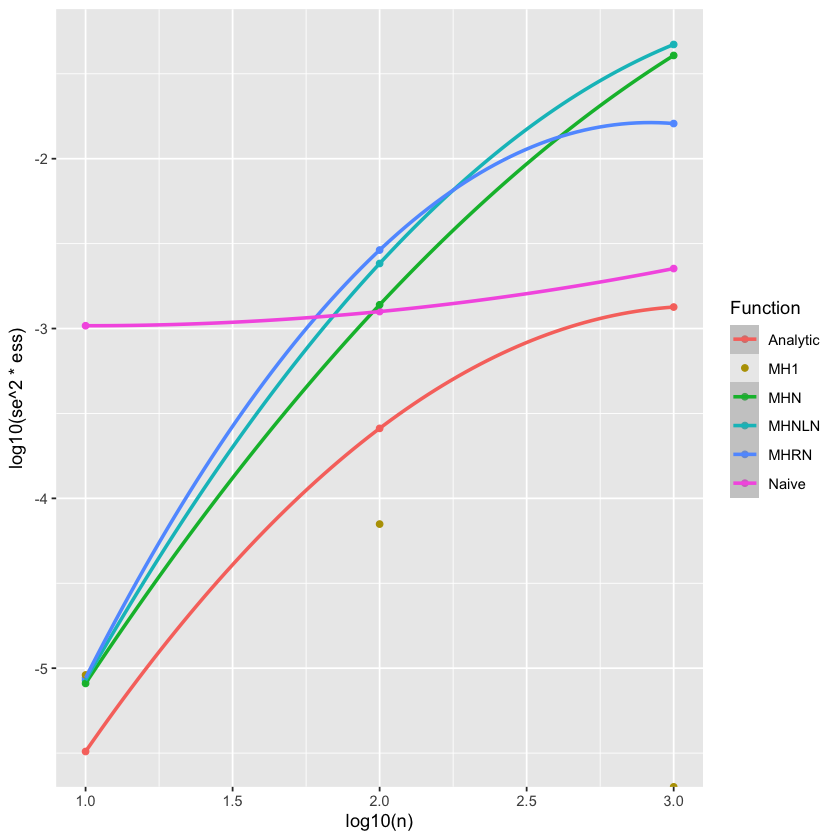

In [31]:
# Base variance estimates
ggplot(data = results, mapping = aes(x=log10(n), y=log10(se^2*ess), color=Function)) + 
geom_point() +
geom_smooth(method="lm", formula = y ~ poly(x,2))

It's interesting that all the samplers except Naive perform worse as the graph size grows.

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_smooth()`)."
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message:
"Failed to fit group 2.
Caused by error in `poly()`:
! 'degree' must be less than number of unique points"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


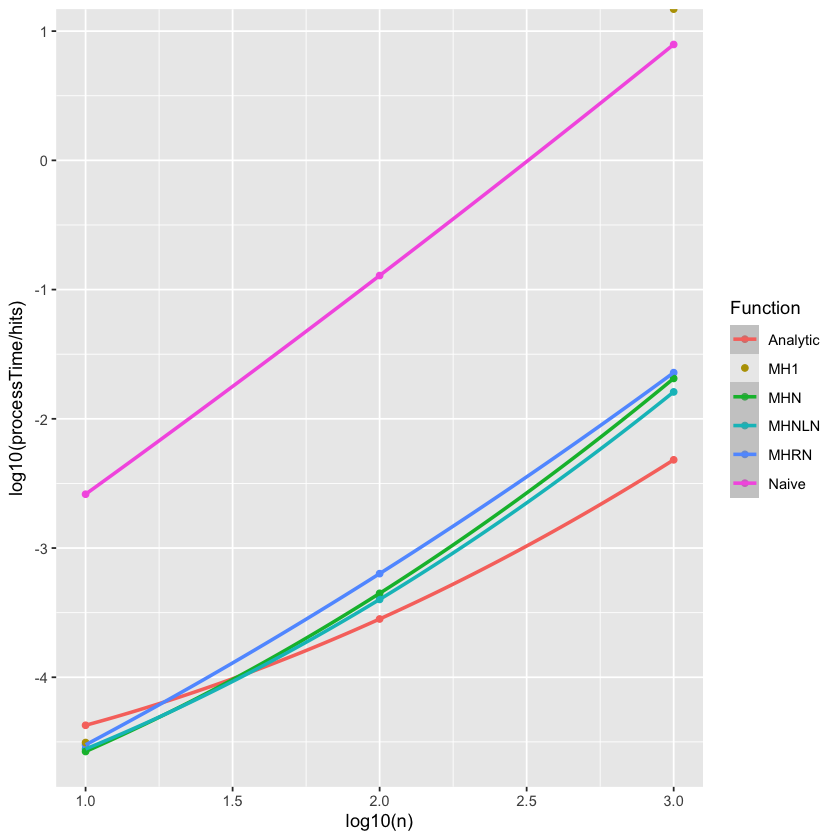

In [29]:
# Computer time per hit
ggplot(data = results, mapping = aes(x=log10(n), y=log10(processTime/hits), color=Function)) + 
geom_point() +
geom_smooth(method="lm", formula = y ~ poly(x,2))

# Part 2 - Mixing Analysis on MCMC chains

In [11]:
# Now let's just look at the MH samplers
results_mh = results[results$Function %in% c("MH1", "MHRN", "MHNLN", "MHN"),]
head(results_mh)

,Function,n,p,b,mu,se,hits,ess,processTime
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,MHRN,1000,0.005098,100000,0.0012612210,6.698491e-03,4294,358.9535,97.786806
2,MHNLN,10,0.075400,100000,0.0009948162,5.046475e-05,36096,3334.6179,1.005325
4,MHNLN,1000,0.005098,100000,0.0034082941,1.435876e-03,4573,22819.8710,73.847416
5,MH1,100,0.027320,100000,0.0001883840,4.699276e-04,9261,319.5344,3.877555
7,MH1,1000,0.005098,100000,0.0000000000,0.000000e+00,0,100000.0000,47.758383
8,MHN,1000,0.005098,100000,0.0028267073,1.264886e-03,4725,25341.6203,97.031347


We run a separate sampler on $n=100$ with $b = 1e5$ iterations to observe the
convergence behaviour of the MCMC samplers.

In [12]:
mixing <- read.csv("mixing_100_100000.csv")
head(mixing)
colMeans(mixing)

,X,MH1W,MH1E,MH1C,MHRNW,MHRNE,MHRNC,MHNW,MHNE,MHNC,MHNLNW,MHNLNE,MHNLNC
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,170,4,0,174,4,0.000000e+00,99,18,0.000000e+00,171,4
2,1,0,170,4,0,170,4,0.000000e+00,153,5,0.000000e+00,145,5
3,2,0,171,4,0,169,4,0.000000e+00,153,5,0.000000e+00,101,18
4,3,0,172,4,0,173,4,0.000000e+00,180,2,0.000000e+00,101,18
5,4,0,173,4,0,188,4,0.000000e+00,192,2,0.000000e+00,161,4
6,5,0,175,4,0,183,4,5.317731e-44,328,1,2.818127e-12,231,1


X         MH1W         MH1E         MH1C        MHRNW        MHRNE 
4.999950e+04 1.857196e-03 1.833344e+02 5.620110e+00 1.347749e-03 2.872016e+02 
       MHRNC         MHNW         MHNE         MHNC       MHNLNW       MHNLNE 
2.718880e+00 1.327592e-03 2.806232e+02 2.970780e+00 1.532556e-03 2.792668e+02 
      MHNLNC 
2.968660e+00

In [13]:
library(coda)

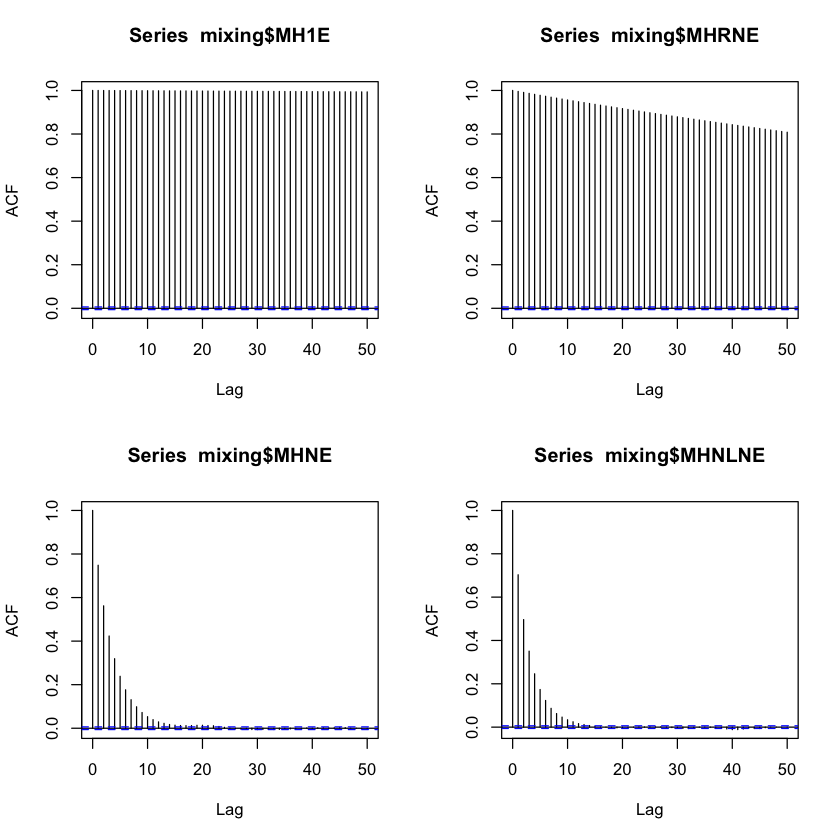

In [14]:
par(mfrow=c(2,2))
acf(mixing$MH1E)
acf(mixing$MHRNE)
acf(mixing$MHNE)
acf(mixing$MHNLNE)

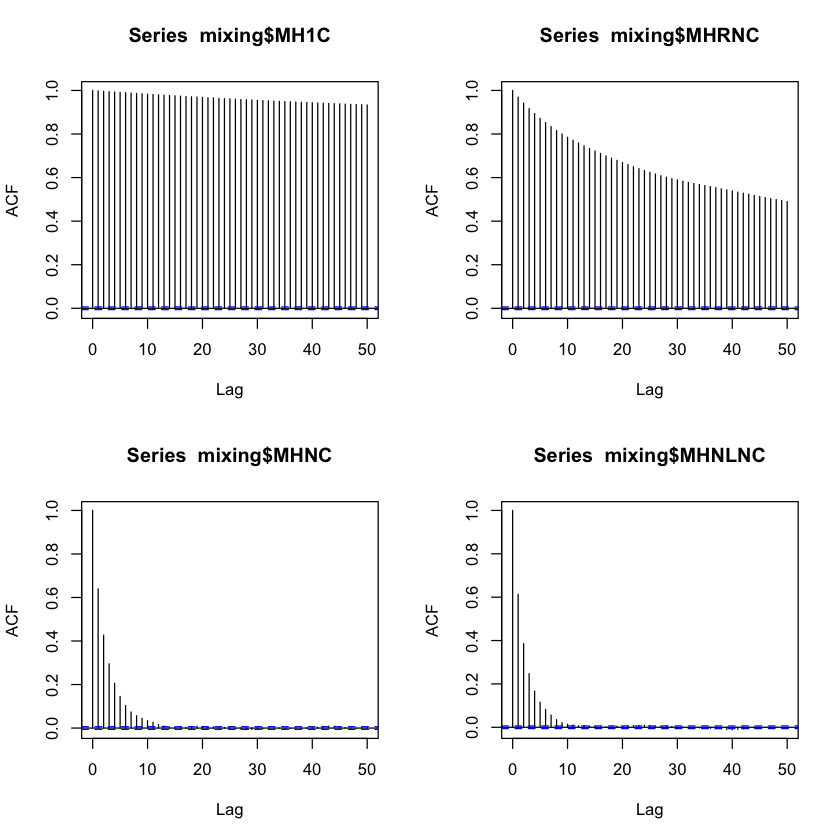

In [15]:
par(mfrow=c(2,2))
acf(mixing$MH1C)
acf(mixing$MHRNC)
acf(mixing$MHNC)
acf(mixing$MHNLNC)

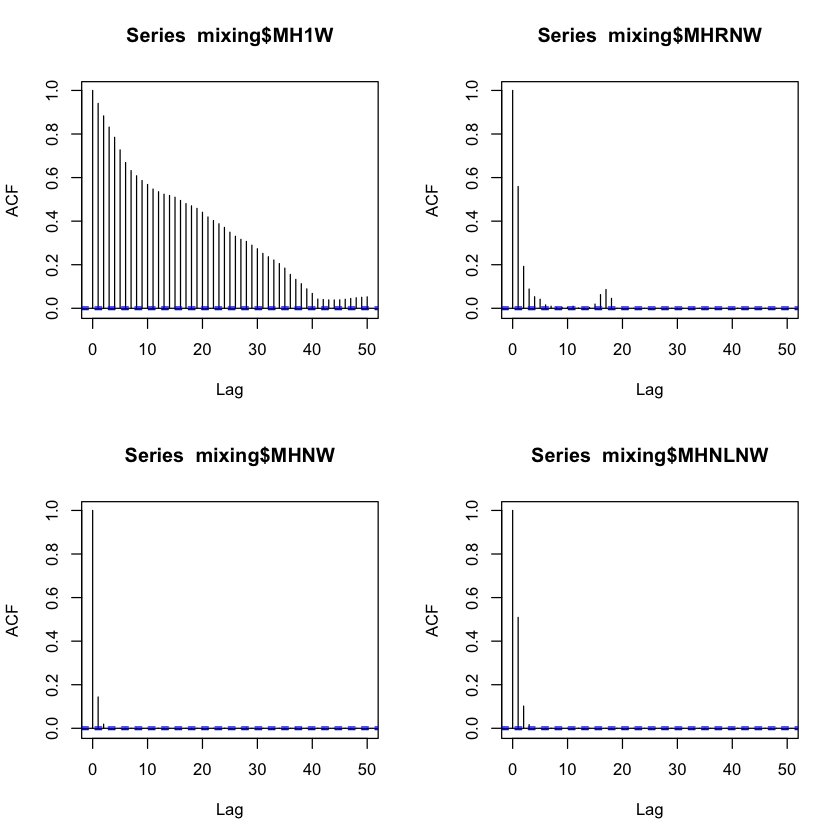

In [16]:
par(mfrow=c(2,2))
acf(mixing$MH1W)
acf(mixing$MHRNW)
acf(mixing$MHNW)
acf(mixing$MHNLNW)

The mixing in the edges and number of components agrees with what we expected. The larger MCMC moves had better mixing and lower acf. Interestingly autocorrelatoin is low for the importance weights. In some cases this might be
misleading.

In [17]:
range(mixing$MH1C)
range(mixing$MHRNC)
range(mixing$MHNC)
range(mixing$MHNLNC)

[1]  1 25

[1]  1 26

[1]  1 24

[1]  1 24

We look at the ESS estimates from coda.

In [18]:
print("Step = 1")
effectiveSize(mixing$MH1E)
effectiveSize(mixing$MH1C)
effectiveSize(mixing$MH1W)

print("Step = RN")
effectiveSize(mixing$MHRNE)
effectiveSize(mixing$MHRNC)
effectiveSize(mixing$MHRNW)

print("Step = N")
effectiveSize(mixing$MHNE)
effectiveSize(mixing$MHNC)
effectiveSize(mixing$MHNW)

print("Step = NLNN")
effectiveSize(mixing$MHNLNE)
effectiveSize(mixing$MHNLNC)
effectiveSize(mixing$MHNLNW)

[1] "Step = 1"


var1 
7.21903

var1 
57.00011

var1 
2525.599

[1] "Step = RN"


var1 
225.8159

var1 
670.4277

var1 
28996.81

[1] "Step = N"


var1 
14395.92

var1 
19299.46

var1 
74874.59

[1] "Step = NLNN"


var1 
17437.57

var1 
21764

var1 
44651.9

# Part 3 - rates of convergence

Finally we look want to assess rates of convergence. First we look at the resultes from our original simulations.

In [19]:
mu_results <- results %>%
  select(Function, n, mu) %>% # Select relevant columns
  arrange(n) %>%
  pivot_wider(names_from = n, values_from = mu) 
mu_results
write.csv(mu_results, "mu_results.csv", row.names=FALSE, quote=FALSE)

se_results <- results %>%
  select(Function, n, se) %>% # Select relevant columns
  arrange(n) %>%
  pivot_wider(names_from = n, values_from = se) 
se_results
write.csv(se_results, "se_results.csv", row.names=FALSE, quote=FALSE)

time_results <- results %>%
  select(Function, n, processTime) %>% # Select relevant columns
  arrange(n) %>%
  pivot_wider(names_from = n, values_from = processTime) 
time_results
write.csv(time_results, "time_results.csv", row.names=FALSE, quote=FALSE)

Function,10,100,1000
<chr>,<dbl>,<dbl>,<dbl>
MHNLN,0.0009948162,0.001209437,0.003408294
Naive,0.0010400000,0.001260000,0.002260000
MHRN,0.0010141322,0.001788845,0.001261221
Analytic,0.0009991551,0.001228429,0.002062240
MH1,0.0010360198,0.000188384,0.000000000
MHN,0.0009176752,0.001062433,0.002826707


Function,10,100,1000
<chr>,<dbl>,<dbl>,<dbl>
MHNLN,5.046475e-05,0.0004146220,0.0014358764
Naive,1.019273e-04,0.0001121790,0.0001501630
MHRN,3.917578e-05,0.0007313479,0.0066984911
Analytic,5.684811e-06,0.0000508174,0.0001156777
MH1,3.795133e-05,0.0004699276,0.0000000000
MHN,6.176915e-05,0.0002980370,0.0012648861


Function,10,100,1000
<chr>,<dbl>,<dbl>,<dbl>
MHNLN,1.005325,3.632690,73.84742
Naive,0.271367,16.179181,1781.47515
MHRN,1.070653,5.987578,97.78681
Analytic,4.251956,28.248216,481.50912
MH1,1.125392,3.877555,47.75838
MHN,0.902970,3.965422,97.03135


Now let's return to our indepth analysis of the mixing data at $n=100$

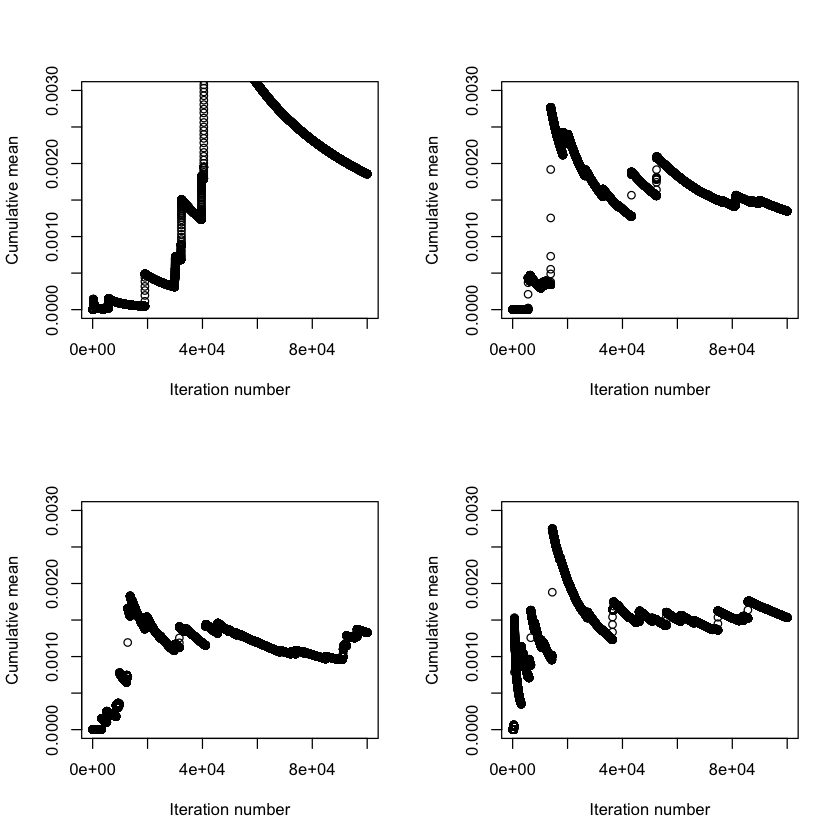

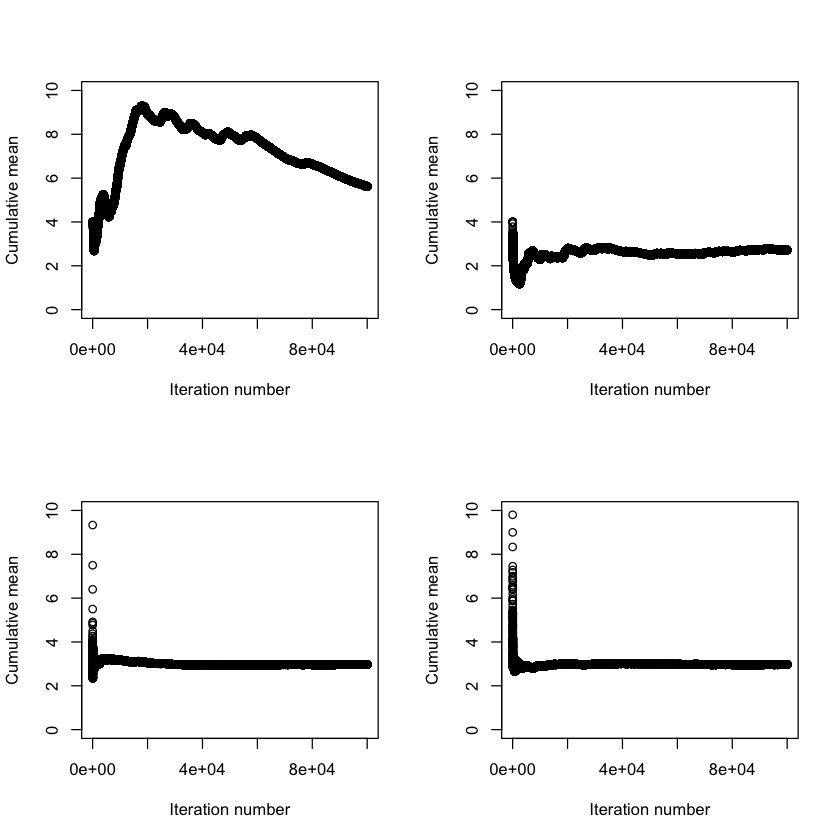

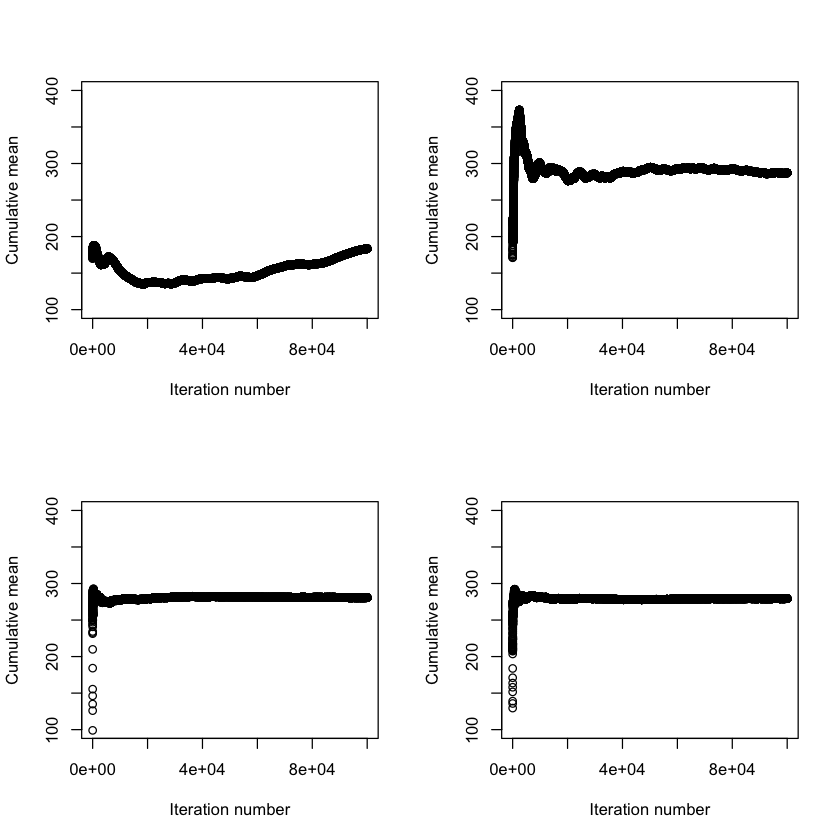

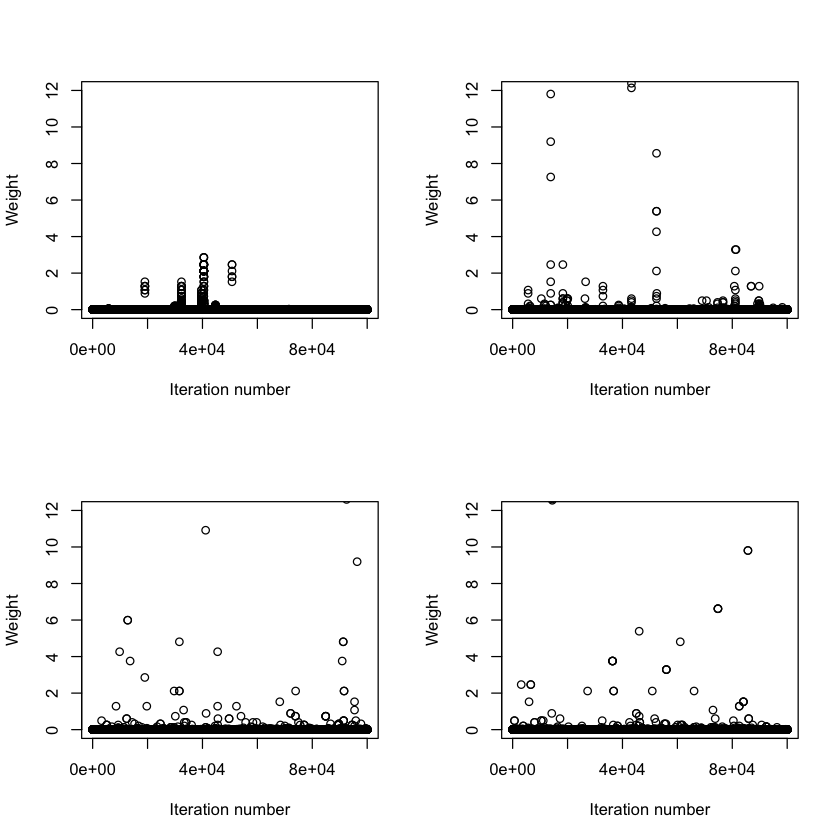

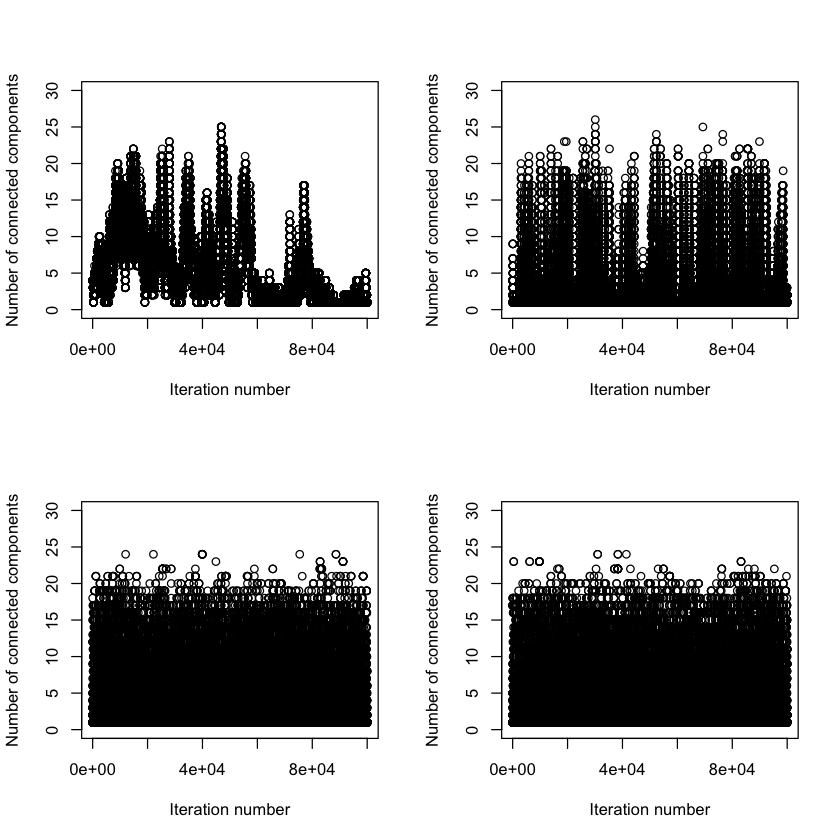

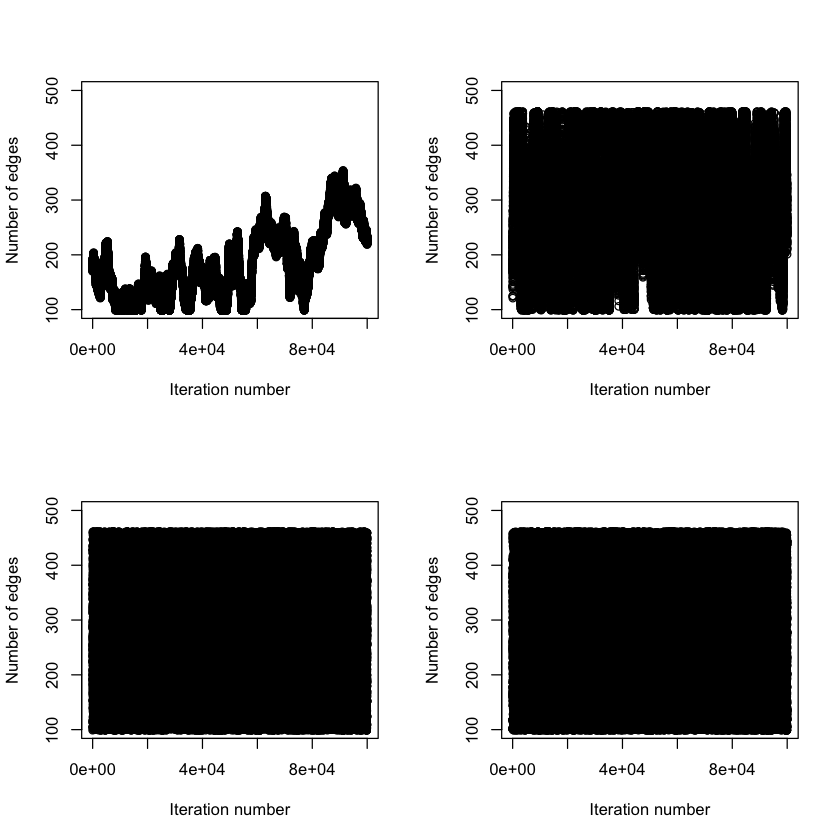

In [36]:
par(mfrow=c(2,2))
for (anal_seq in list(mixing$MH1W, mixing$MHRNW, mixing$MHNW, mixing$MHNLNW)){
    plot(cumsum(anal_seq)/seq_along(anal_seq),ylim=c(0,3e-3),
    ylab="Cumulative mean",xlab="Iteration number")
}
for (anal_seq in list(mixing$MH1C, mixing$MHRNC, mixing$MHNC, mixing$MHNLNC)){
    plot(cumsum(anal_seq)/seq_along(anal_seq),ylim=c(0,10),
    ylab="Cumulative mean",xlab="Iteration number")
}
for (anal_seq in list(mixing$MH1E, mixing$MHRNE, mixing$MHNE, mixing$MHNLNE)){
    plot(cumsum(anal_seq)/seq_along(anal_seq),ylim=c(100,400),
    ylab="Cumulative mean",xlab="Iteration number")
}
for (anal_seq in list(mixing$MH1W, mixing$MHRNW, mixing$MHNW, mixing$MHNLNW)){
    plot(anal_seq, xlab="Iteration number", ylab="Weight", ylim=c(0,12))
}
for (anal_seq in list(mixing$MH1C, mixing$MHRNC, mixing$MHNC, mixing$MHNLNC)){
    plot(anal_seq, xlab="Iteration number",ylim=c(0,30),
    ylab="Number of connected components")
}
for (anal_seq in list(mixing$MH1E, mixing$MHRNE, mixing$MHNE, mixing$MHNLNE)){
    plot(anal_seq, xlab="Iteration number",ylab="Number of edges",ylim=c(100,500))
}


In [21]:
# for (anal_seq in list(mixing$MH1W, mixing$MHRNW, mixing$MHNW, mixing$MHNLNW)){
#     print("---")
#     print(mean(anal_seq))
#     print(sd(anal_seq))
#     print(effectiveSize(anal_seq))
#     print(sd(anal_seq)/sqrt(effectiveSize(anal_seq)))
# }

We quickly look at mixing for 10 nodes

In [22]:
mixing10 <- read.csv("mixing_10_100000.csv")
head(mixing10)

,X,MH1W,MH1E,MH1C,MHRNW,MHRNE,MHRNC,MHNW,MHNE,MHNC,MHNLNW,MHNLNE,MHNLNC
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0002281372,13,1,2.281372e-04,13,1,7.174996e-06,15,1,2.281372e-04,13,1
2,1,0.0002281372,13,1,1.101435e-03,12,1,7.174996e-06,15,1,2.281372e-04,13,1
3,2,0.0011014352,12,1,0.000000e+00,10,2,2.317028e-11,21,1,2.281372e-04,13,1
4,3,0.0011014352,12,1,2.385305e-10,20,1,2.062464e-12,22,1,2.317028e-11,21,1
5,4,0.0000000000,11,2,2.062464e-12,22,1,2.062464e-12,22,1,2.317028e-11,21,1
6,5,0.0000000000,11,2,1.682879e-13,23,1,2.062464e-12,22,1,1.939355e-08,18,1


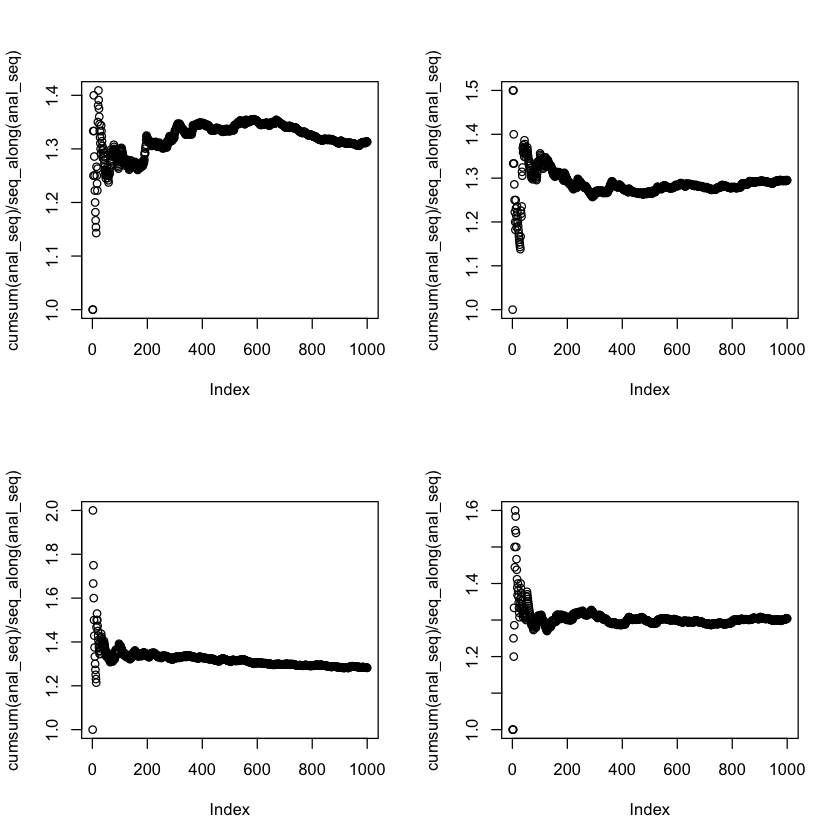

In [23]:
mixing10 <- read.csv("mixing_10_100000.csv")
par(mfrow=c(2,2))
for (anal_seq in list(mixing10$MH1C, mixing10$MHRNC, mixing10$MHNC, mixing10$MHNLNC)){
    anal_seq <- anal_seq[seq_along(anal_seq) %% 100 == 1]
    plot(cumsum(anal_seq)/seq_along(anal_seq))
}

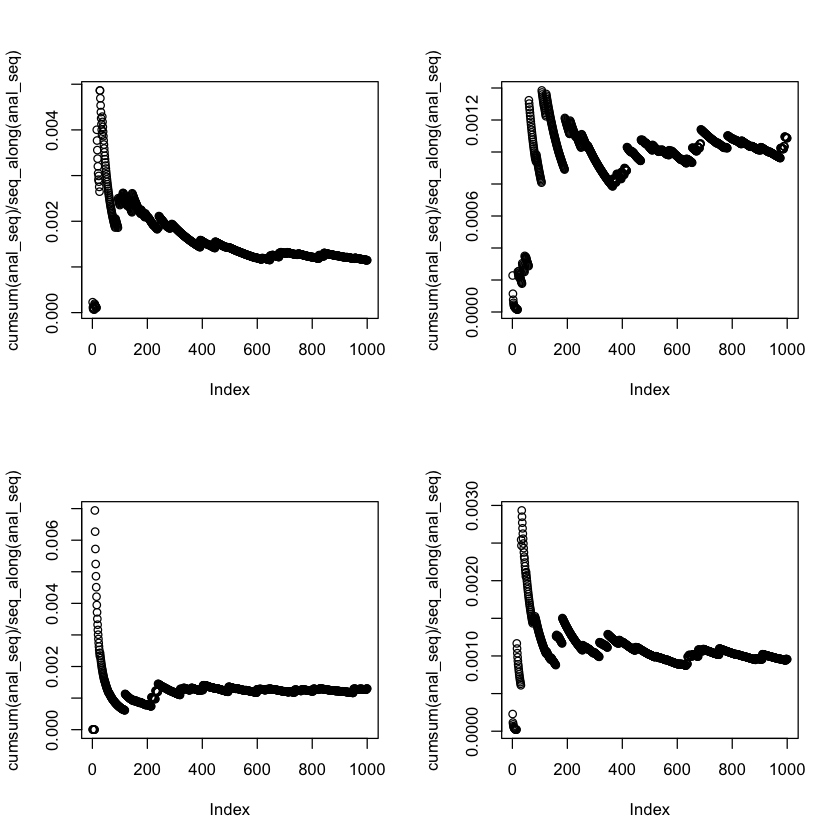

In [24]:
par(mfrow=c(2,2))
for (anal_seq in list(mixing10$MH1W, mixing10$MHRNW, mixing10$MHNW, mixing10$MHNLNW)){
    anal_seq <- anal_seq[seq_along(anal_seq) %% 100 == 1]
    plot(cumsum(anal_seq)/seq_along(anal_seq))
}

In [25]:
effectiveSize(mixing10$MH1W)
effectiveSize(mixing10$MHRNW)
effectiveSize(mixing10$MHNW)
effectiveSize(mixing10$MHNLNW)

var1 
9022.124

var1 
22270.72

var1 
22491.14

var1 
26625.68